# 무임승차

## 노조가 주장하는 인력 감축 해결책 - 무임승차율 감소

- 무임승차율 감소로 이익 증가, 인력 감축 해결
- 무임승차율을 줄이기 위해 나이 증가
- 무임승차율: https://data.seoul.go.kr/dataList/OA-12251/S/1/datasetView.do
- X현재 연령 나이X: https://data.seoul.go.kr/dataList/10727/S/2/datasetView.do
- 2018~2022 연령별 인구: https://data.seoul.go.kr/dataList/OA-15439/S/1/datasetView.do
- 자녀 동거: https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=DT_117071_029&markType=C
- 노인 취업률

- 나이 낮추기, 특정 시간대에 무조건 돈 받기(붐비는 지하철 피하던 유임승차자들 지하철 탑승)
- 버스 분석 후 무임승차율 없앴을 때의 기대값?
- 독립변수: '무임승차율(무임승차율로 인한 손실 증명)', '연령/고령화율', '독거 노인/부양가족과 함께 거주', '노인 취업률', (집값), (버스 승차율), 자녀 동거율(자녀와 함께 살면 지하철 이용률 감소), '기름값/유가'
- 종속변수: 수익

## 코드 계획

- 무임승차율
- 무임승차자 중 노인 비율
    - 기사: https://news.sbs.co.kr/news/endPage.do?news_id=N1007065167
- 무임승차자로인해 벌지 못하는 수익
- 여러 대체에 대한 수익 상승률

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

### 무임승차율

In [3]:
df = pd.read_csv('C:/Users/sunny/!!!기계 학습/서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv', sep = ',', header = 0, engine = 'python', encoding='euc-kr', encoding_errors='ignore')

In [4]:
df.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202310,1호선,서울역,1414759,228199,1325225,221362,20231103
1,202310,1호선,시청,680015,110873,688576,109588,20231103
2,202310,1호선,종각,934182,153323,912219,142417,20231103
3,202310,1호선,종로3가,505893,318029,450857,290405,20231103
4,202310,1호선,종로5가,496473,268981,499265,260177,20231103


In [5]:
# 정제
df.iloc[1]

사용월         202310
호선명            1호선
지하철역            시청
유임승차인원      680015
무임승차인원      110873
유임하차인원      688576
무임하차인원      109588
작업일자      20231103
Name: 1, dtype: object

In [6]:
# No need
selected_column = ['무임승차인원']  # 원하는 열 이름을 나열
df_FreeRiding= df[selected_column]

In [125]:
listOfMetroLines = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선', '분당선', '서해선', '수인선', '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선']
list_FreeRiders = []
for m in listOfMetroLines:
    r = 0
    for i in range(63542):
        if (df['사용월'].iloc[i] == 202310) and (df['호선명'].iloc[i] == m):
            r += df['무임승차인원'].iloc[i]
    list_FreeRiders.append(r)
print(list_FreeRiders)

[2086128, 5140995, 3019138, 2906761, 3766098, 1953245, 3163264, 1163376, 1237244, 184651, 2355262, 1855997, 716005, 1962799, 383424, 351050, 628674, 2023735, 55856, 448074, 339848, 618617, 519823, 818253, 129575, 776847]


In [126]:
list_AllRiders = []
for m in listOfMetroLines:
    r = 0
    for i in range(63542):
        if (df['사용월'].iloc[i] == 202310) and (df['호선명'].iloc[i] == m):
            r = r + df['무임승차인원'].iloc[i] + df['유임승차인원'].iloc[i]
    list_AllRiders.append(r)
print(list_AllRiders)

[7404992, 40252744, 15831307, 15361598, 19239174, 10320049, 17298372, 5594029, 8271242, 1030075, 14149336, 6334303, 3592691, 8361222, 1273491, 3888818, 3206718, 11018216, 290079, 1940873, 1278105, 3746726, 1439725, 3355783, 592001, 2941869]


In [127]:
dict_FreeRiders = {}
for metro_line, free_rider in zip(listOfMetroLines, list_FreeRiders):
    dict_FreeRiders[metro_line] = free_rider

print(dict_FreeRiders)

{'1호선': 2086128, '2호선': 5140995, '3호선': 3019138, '4호선': 2906761, '5호선': 3766098, '6호선': 1953245, '7호선': 3163264, '8호선': 1163376, '9호선': 1237244, '경강선': 184651, '경부선': 2355262, '경원선': 1855997, '경의선': 716005, '경인선': 1962799, '경춘선': 383424, '공항철도 1호선': 351050, '과천선': 628674, '분당선': 2023735, '서해선': 55856, '수인선': 448074, '신림선': 339848, '안산선': 618617, '우이신설선': 519823, '일산선': 818253, '장항선': 129575, '중앙선': 776847}


In [128]:
dict_AllRiders = {}
for metro_line, all_riders in zip(listOfMetroLines, list_AllRiders):
    dict_AllRiders[metro_line] = all_riders

print(dict_AllRiders)

{'1호선': 7404992, '2호선': 40252744, '3호선': 15831307, '4호선': 15361598, '5호선': 19239174, '6호선': 10320049, '7호선': 17298372, '8호선': 5594029, '9호선': 8271242, '경강선': 1030075, '경부선': 14149336, '경원선': 6334303, '경의선': 3592691, '경인선': 8361222, '경춘선': 1273491, '공항철도 1호선': 3888818, '과천선': 3206718, '분당선': 11018216, '서해선': 290079, '수인선': 1940873, '신림선': 1278105, '안산선': 3746726, '우이신설선': 1439725, '일산선': 3355783, '장항선': 592001, '중앙선': 2941869}


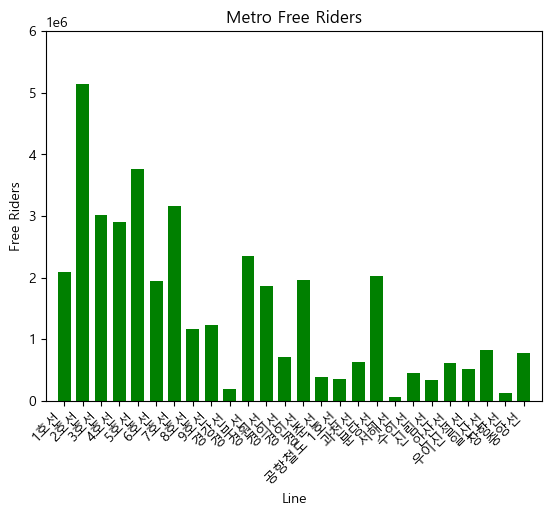

In [129]:
line = list(dict_FreeRiders.keys())
riders = list(dict_FreeRiders.values())

# Create a bar plot
plt.bar(line, riders, color='green', width=0.7)

# Adding labels and title
plt.xlabel('Line')
plt.ylabel('Free Riders')
plt.title('Metro Free Riders')
plt.xticks(rotation=45, ha='right')
bar_spacing = 1
plt.xlim(-bar_spacing, len(line) - 1 + bar_spacing)
plt.ylim(0, 6000000)

plt.show()

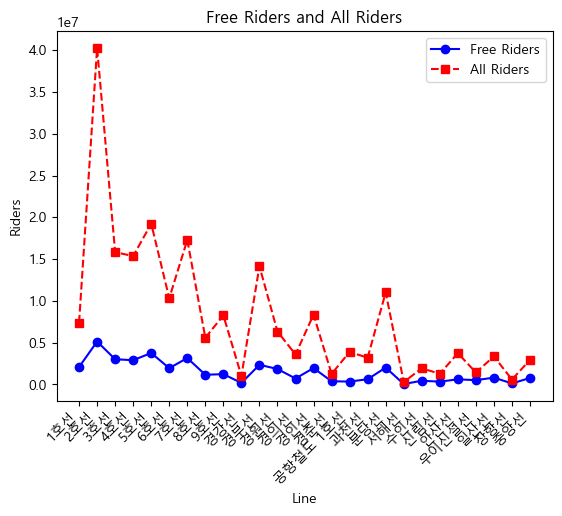

In [132]:
x_values = list(dict_FreeRiders.keys())
y_values = list(dict_FreeRiders.values())

# Create a line chart
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Free Riders')

# Your new line data
y_values2 = list(dict_AllRiders.values())

# Add the new line to the existing plot
plt.plot(x_values, y_values2, marker='s', linestyle='--', color='r', label='All Riders')


# Add labels and a title
plt.xlabel('Line')
plt.ylabel('Riders')
plt.title('Free Riders and All Riders')
plt.xticks(rotation=45, ha='right')

# Show a legend
plt.legend()

# Show the plot
plt.show()

In [133]:
# 무임승차율

percentage_dict = {}

for key in dict_FreeRiders:
    if key in dict_AllRiders:
        if dict_AllRiders[key] != 0:
            percentage = (dict_FreeRiders[key] / dict_AllRiders[key]) * 100
            percentage_dict[key] = percentage
        else:
            percentage_dict[key] = 0

print(percentage_dict)

{'1호선': 28.171914297814233, '2호선': 12.771787682350302, '3호선': 19.070680645634628, '4호선': 18.922256655850518, '5호선': 19.575154317955644, '6호선': 18.926702770500412, '7호선': 18.286483837901045, '8호선': 20.796745958950158, '9호선': 14.95838230824343, '경강선': 17.925976263864282, '경부선': 16.645742245431165, '경원선': 29.300729693543236, '경의선': 19.92949017881026, '경인선': 23.475025540525056, '경춘선': 30.108104415343334, '공항철도 1호선': 9.02716455231384, '과천선': 19.60490445371249, '분당선': 18.36717486751031, '서해선': 19.255444206578208, '수인선': 23.086209144029514, '신림선': 26.58999065022044, '안산선': 16.510868422190466, '우이신설선': 36.105714633002826, '일산선': 24.38337043843419, '장항선': 21.887631946567655, '중앙선': 26.406580306601008}


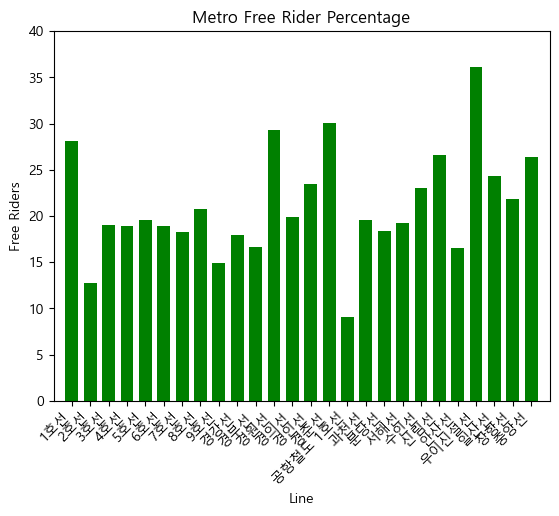

In [134]:
lines = list(percentage_dict.keys())
percent_free = list(percentage_dict.values())

# Create a bar plot
plt.bar(lines, percent_free, color='green', width=0.7)

# Adding labels and title
plt.xlabel('Line')
plt.ylabel('Free Riders')
plt.title('Metro Free Rider Percentage')
plt.xticks(rotation=45, ha='right')
bar_spacing = 1
plt.xlim(-bar_spacing, len(line) - 1 + bar_spacing)
plt.ylim(0, 40)

plt.show()

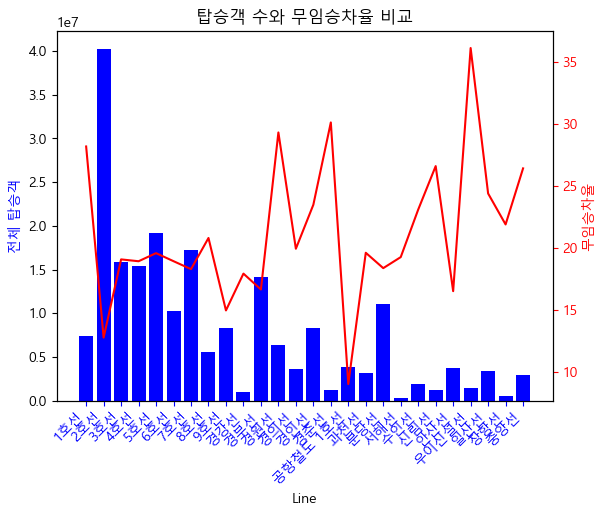

In [21]:
x_values = list(dict_AllRiders.keys())
y_values = list(dict_AllRiders.values())
y_values2 = list(percentage_dict.values())



# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot the bar graph on the primary y-axis (ax1)
ax1.bar(x_values, y_values, color='b', label='Bar Graph')
ax1.set_xlabel('Line')
ax1.set_ylabel('전체 탑승객', color='b')
ax1.tick_params('x', colors='b')

plt.xticks(rotation=45, ha='right')

# Create a secondary y-axis (ax2) for the line graph
ax2 = ax1.twinx()
ax2.plot(x_values, y_values2, color='r', label='Line Graph')
ax2.set_ylabel('무임승차율', color='r')
ax2.tick_params('y', colors='r')


# Display the plot
plt.title('탑승객 수와 무임승차율 비교')
plt.show()

### 모든 월별로 표 만들기

In [143]:
listOfMetroLines = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선', '분당선', '서해선', '수인선', '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선']
class FreeRiderGraph:
    def FreeRiders(self, a):
        list_FreeRiders = []
        for m in listOfMetroLines:
            r = 0
            for i in range(63542):
                if (df['사용월'].iloc[i] == a) and (df['호선명'].iloc[i] == m):
                    r += df['무임승차인원'].iloc[i]
            list_FreeRiders.append(r)
        #print(list_FreeRiders)
    
        dict_FreeRiders = {}
        for metro_line, free_rider in zip(listOfMetroLines, list_FreeRiders):
            dict_FreeRiders[metro_line] = free_rider
        return dict_FreeRiders
    
    def AllRiders(self, a):
        list_AllRiders = []
        for m in listOfMetroLines:
            r = 0
            for i in range(63542):
                if (df['사용월'].iloc[i] == a) and (df['호선명'].iloc[i] == m):
                    r = r + df['무임승차인원'].iloc[i] + df['유임승차인원'].iloc[i]
            list_AllRiders.append(r)
        #print(list_AllRiders)
    
        dict_AllRiders = {}
        for metro_line, all_riders in zip(listOfMetroLines, list_AllRiders):
            dict_AllRiders[metro_line] = all_riders
        return dict_AllRiders
        
        
    def GetPercentage(self, a):
        percentage_dict = {}
        dict_FreeRiders = {}
        dict_AllRiders = {}
  
        dict_FreeRiders = make_freegraph.FreeRiders(i)
        dict_AllRiders = make_freegraph.AllRiders(i)

        for key in dict_FreeRiders:
            if key in dict_AllRiders:
                if dict_AllRiders[key] != 0:
                    percentage = (dict_FreeRiders[key] / dict_AllRiders[key]) * 100
                    percentage_dict[key] = percentage
                else:
                    percentage_dict[key] = 0
        return dict_FreeRiders, dict_AllRiders, percentage_dict
    
"""        # make graph
        x_values = list(dict_AllRiders.keys())
        y_values = list(dict_AllRiders.values())
        y_values2 = list(percentage_dict.values())
    
        # Create figure and axis objects
        fig, ax1 = plt.subplots()
    
        # Plot the bar graph on the primary y-axis (ax1)
        ax1.bar(x_values, y_values, color='b', label='Bar Graph')
        ax1.set_xlabel('Line')
        ax1.set_ylabel('전체 탑승객', color='b')
        ax1.tick_params('x', colors='b')
        plt.xticks(rotation=45, ha='right')
    
        # Create a secondary y-axis (ax2) for the line graph
        ax2 = ax1.twinx()
        ax2.plot(x_values, y_values2, color='r', label='Line Graph')
        ax2.set_ylabel('무임승차율', color='r')
        ax2.tick_params('y', colors='r')
    
        # Display the plot
        plt.title('탑승객 수와 무임승차율 비교')
        plt.show()"""
    
make_freegraph = FreeRiderGraph()

{'1호선': 6825313, '2호선': 41972349, '3호선': 14230036, '4호선': 15242618, '5호선': 14453042, '6호선': 8128025, '7호선': 17949814, '8호선': 3886429, '9호선': 6570390, '경강선': 0, '경부선': 0, '경원선': 0, '경의선': 0, '경인선': 0, '경춘선': 0, '공항철도 1호선': 0, '과천선': 0, '분당선': 0, '서해선': 0, '수인선': 0, '신림선': 0, '안산선': 0, '우이신설선': 0, '일산선': 0, '장항선': 0, '중앙선': 0}


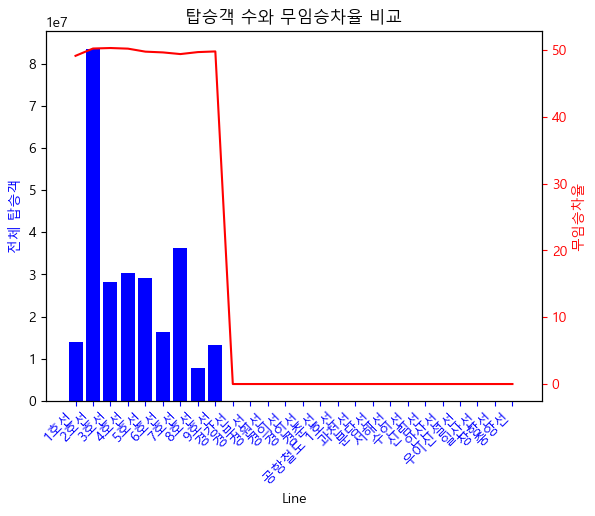

{'1호선': 5842869, '2호선': 35872445, '3호선': 12366631, '4호선': 13244959, '5호선': 12372184, '6호선': 7031224, '7호선': 15477268, '8호선': 3355522, '9호선': 5601375, '경강선': 0, '경부선': 0, '경원선': 0, '경의선': 0, '경인선': 0, '경춘선': 0, '공항철도 1호선': 0, '과천선': 0, '분당선': 0, '서해선': 0, '수인선': 0, '신림선': 0, '안산선': 0, '우이신설선': 0, '일산선': 0, '장항선': 0, '중앙선': 0}


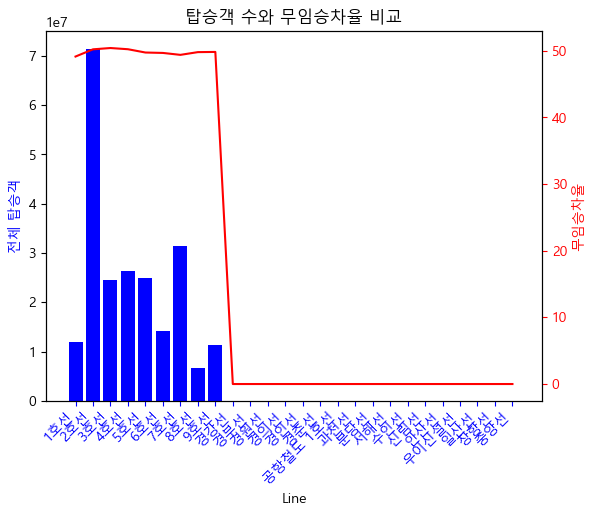

{'1호선': 6839035, '2호선': 44564108, '3호선': 15191975, '4호선': 16842045, '5호선': 15720884, '6호선': 9342298, '7호선': 19887055, '8호선': 4277459, '9호선': 7025091, '경강선': 0, '경부선': 0, '경원선': 0, '경의선': 0, '경인선': 0, '경춘선': 0, '공항철도 1호선': 0, '과천선': 0, '분당선': 0, '서해선': 0, '수인선': 0, '신림선': 0, '안산선': 0, '우이신설선': 0, '일산선': 0, '장항선': 0, '중앙선': 0}


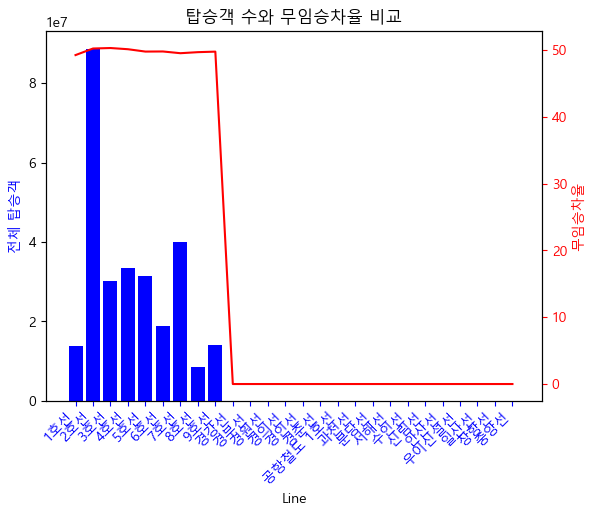

{'1호선': 6561538, '2호선': 43152854, '3호선': 14846396, '4호선': 16487970, '5호선': 15748168, '6호선': 9080349, '7호선': 19410854, '8호선': 4239766, '9호선': 7836278, '경강선': 0, '경부선': 0, '경원선': 0, '경의선': 0, '경인선': 0, '경춘선': 0, '공항철도 1호선': 0, '과천선': 0, '분당선': 0, '서해선': 0, '수인선': 0, '신림선': 0, '안산선': 0, '우이신설선': 0, '일산선': 0, '장항선': 0, '중앙선': 0}


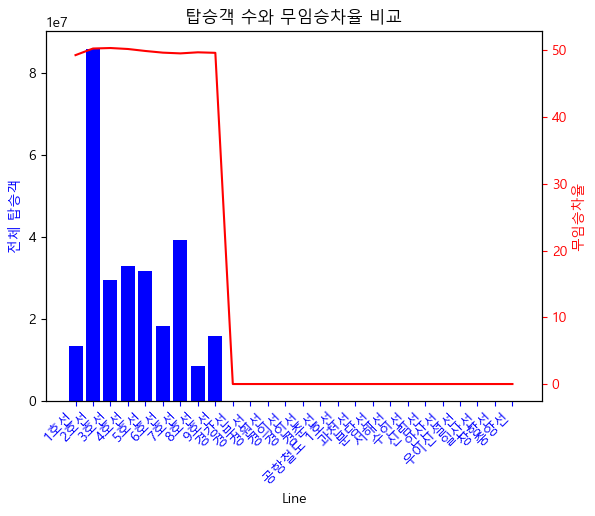

{'1호선': 6555006, '2호선': 42549421, '3호선': 14787604, '4호선': 16614892, '5호선': 15124009, '6호선': 9165434, '7호선': 18962618, '8호선': 4156715, '9호선': 7459886, '경강선': 0, '경부선': 0, '경원선': 0, '경의선': 0, '경인선': 0, '경춘선': 0, '공항철도 1호선': 0, '과천선': 0, '분당선': 0, '서해선': 0, '수인선': 0, '신림선': 0, '안산선': 0, '우이신설선': 0, '일산선': 0, '장항선': 0, '중앙선': 0}


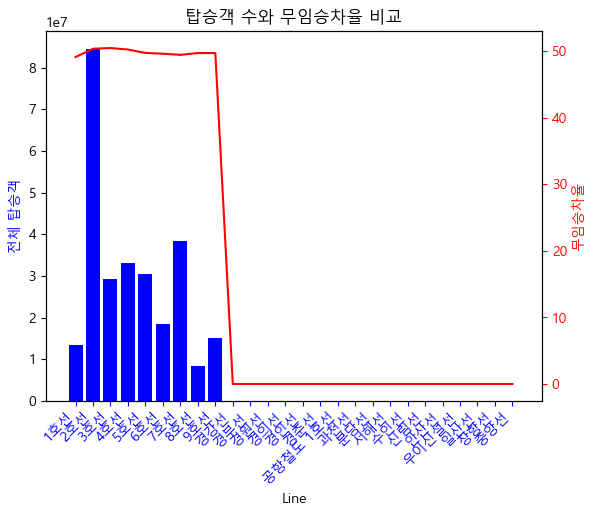

{'1호선': 5504110, '2호선': 37956423, '3호선': 12540293, '4호선': 13999932, '5호선': 13500350, '6호선': 8097109, '7호선': 17043711, '8호선': 3686293, '9호선': 6765701, '경강선': 0, '경부선': 0, '경원선': 0, '경의선': 0, '경인선': 0, '경춘선': 0, '공항철도 1호선': 0, '과천선': 0, '분당선': 0, '서해선': 0, '수인선': 0, '신림선': 0, '안산선': 0, '우이신설선': 0, '일산선': 0, '장항선': 0, '중앙선': 0}


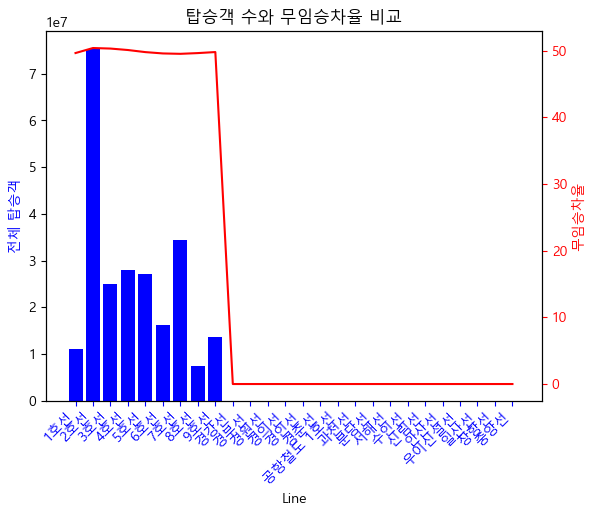

{'1호선': 6139463, '2호선': 41236432, '3호선': 13659969, '4호선': 14603745, '5호선': 14280648, '6호선': 8168621, '7호선': 17686902, '8호선': 3883005, '9호선': 6708456, '경강선': 0, '경부선': 12643511, '경원선': 4714076, '경의선': 2011331, '경인선': 8286553, '경춘선': 837023, '공항철도 1호선': 2210940, '과천선': 2774788, '분당선': 9363783, '서해선': 0, '수인선': 669384, '신림선': 0, '안산선': 3346916, '우이신설선': 0, '일산선': 2283269, '장항선': 271423, '중앙선': 2212359}


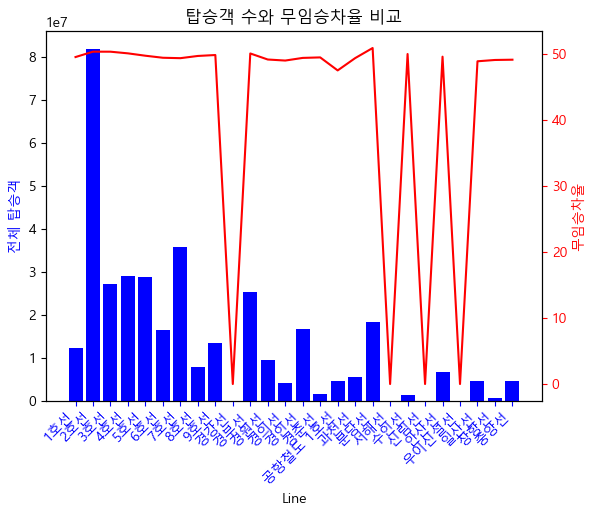

{'1호선': 5994412, '2호선': 39242305, '3호선': 13235365, '4호선': 14242434, '5호선': 13623198, '6호선': 7805820, '7호선': 16730699, '8호선': 3688383, '9호선': 6393454, '경강선': 0, '경부선': 12515488, '경원선': 4592036, '경의선': 1945427, '경인선': 7986464, '경춘선': 940745, '공항철도 1호선': 2245120, '과천선': 2700512, '분당선': 8811860, '서해선': 0, '수인선': 651877, '신림선': 0, '안산선': 3252373, '우이신설선': 0, '일산선': 2214257, '장항선': 285435, '중앙선': 2179920}


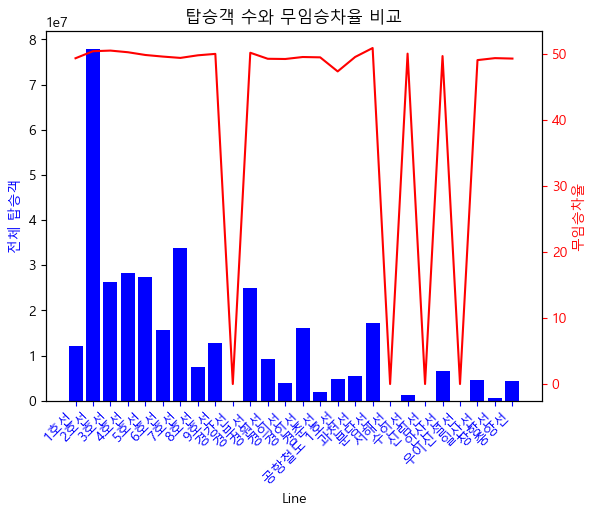

{'1호선': 5967956, '2호선': 38962913, '3호선': 13306641, '4호선': 14880829, '5호선': 13811393, '6호선': 8324628, '7호선': 17402881, '8호선': 3813215, '9호선': 6391057, '경강선': 0, '경부선': 13550154, '경원선': 4942948, '경의선': 2136457, '경인선': 8336808, '경춘선': 853917, '공항철도 1호선': 2179755, '과천선': 2695833, '분당선': 9049361, '서해선': 0, '수인선': 703370, '신림선': 0, '안산선': 3505741, '우이신설선': 0, '일산선': 2250893, '장항선': 372386, '중앙선': 2276514}


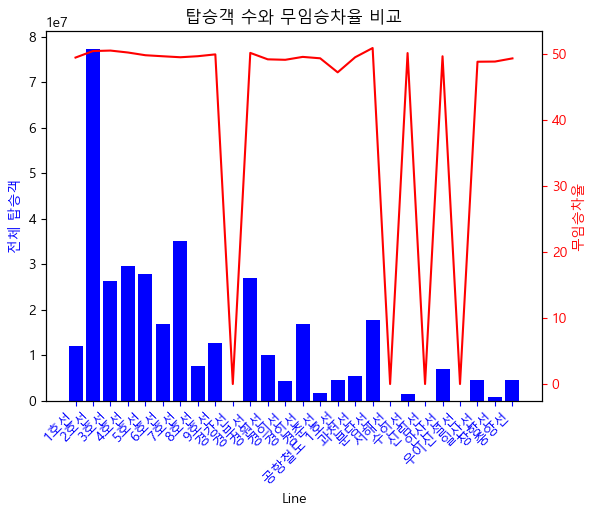

{'1호선': 6482270, '2호선': 42590400, '3호선': 14579336, '4호선': 16304509, '5호선': 15162729, '6호선': 9327616, '7호선': 18818854, '8호선': 4167325, '9호선': 6988895, '경강선': 0, '경부선': 14446584, '경원선': 5293317, '경의선': 2303003, '경인선': 9086920, '경춘선': 943001, '공항철도 1호선': 2351964, '과천선': 3089961, '분당선': 9853546, '서해선': 0, '수인선': 772357, '신림선': 0, '안산선': 3733135, '우이신설선': 0, '일산선': 2474723, '장항선': 379367, '중앙선': 2445456}


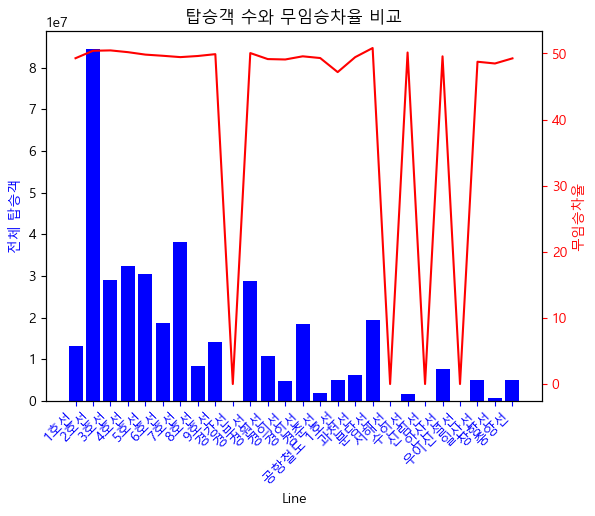

{'1호선': 6634914, '2호선': 42772669, '3호선': 14704853, '4호선': 16335809, '5호선': 15165533, '6호선': 9008485, '7호선': 19023237, '8호선': 4160002, '9호선': 6682704, '경강선': 0, '경부선': 13614691, '경원선': 5246148, '경의선': 2265331, '경인선': 8778077, '경춘선': 820477, '공항철도 1호선': 2258572, '과천선': 2884011, '분당선': 9820775, '서해선': 0, '수인선': 702670, '신림선': 0, '안산선': 3561164, '우이신설선': 0, '일산선': 2402103, '장항선': 374765, '중앙선': 2387788}


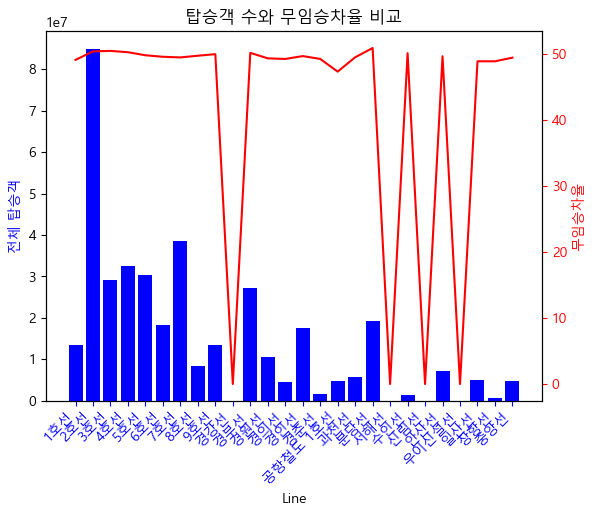

{'1호선': 2260690, '2호선': 5381926, '3호선': 2763119, '4호선': 2920787, '5호선': 3014550, '6호선': 1737236, '7호선': 3102277, '8호선': 929122, '9호선': 1032973, '경강선': 0, '경부선': 2066399, '경원선': 1570748, '경의선': 508008, '경인선': 1789638, '경춘선': 237958, '공항철도 1호선': 245284, '과천선': 509141, '분당선': 1846153, '서해선': 0, '수인선': 149760, '신림선': 0, '안산선': 527049, '우이신설선': 0, '일산선': 753152, '장항선': 123479, '중앙선': 639583}


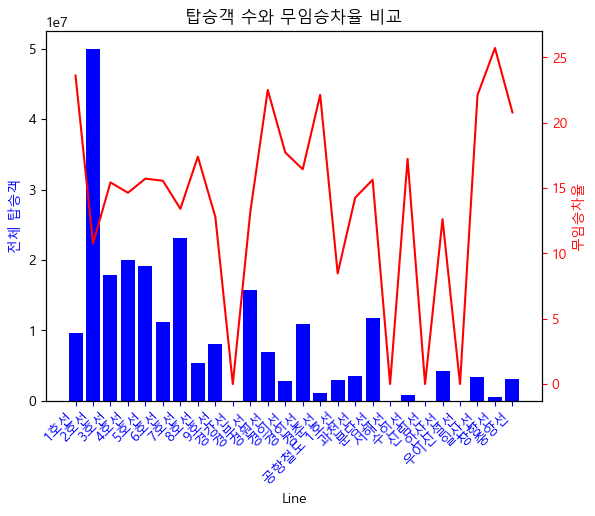

In [147]:
for i in range(201501, 201513):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()

{'1호선': 2058455, '2호선': 4796376, '3호선': 2489032, '4호선': 2595006, '5호선': 2731112, '6호선': 1576114, '7호선': 2803061, '8호선': 848456, '9호선': 929980, '경강선': 0, '경부선': 1854943, '경원선': 1420024, '경의선': 457478, '경인선': 1610732, '경춘선': 213766, '공항철도 1호선': 223910, '과천선': 465936, '분당선': 1650425, '서해선': 0, '수인선': 130015, '신림선': 0, '안산선': 472980, '우이신설선': 0, '일산선': 664124, '장항선': 114291, '중앙선': 573525}


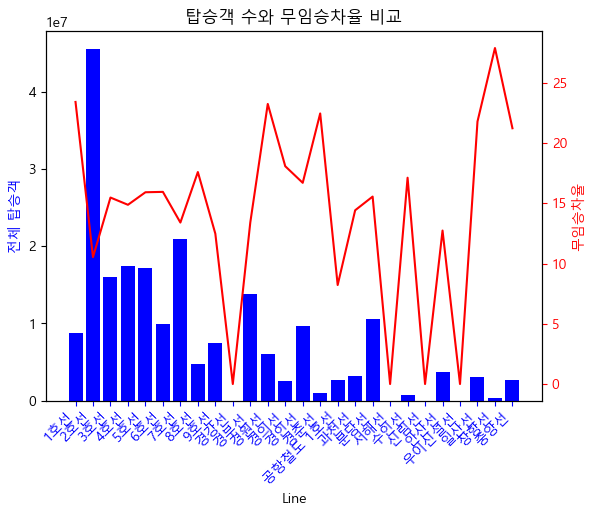

{'1호선': 1882080, '2호선': 4428831, '3호선': 2329605, '4호선': 2419471, '5호선': 2537346, '6호선': 1468690, '7호선': 2615608, '8호선': 786426, '9호선': 867777, '경강선': 0, '경부선': 1729833, '경원선': 1323849, '경의선': 430810, '경인선': 1519636, '경춘선': 201515, '공항철도 1호선': 214200, '과천선': 419308, '분당선': 1485022, '서해선': 0, '수인선': 135624, '신림선': 0, '안산선': 444312, '우이신설선': 0, '일산선': 629357, '장항선': 103483, '중앙선': 536609}


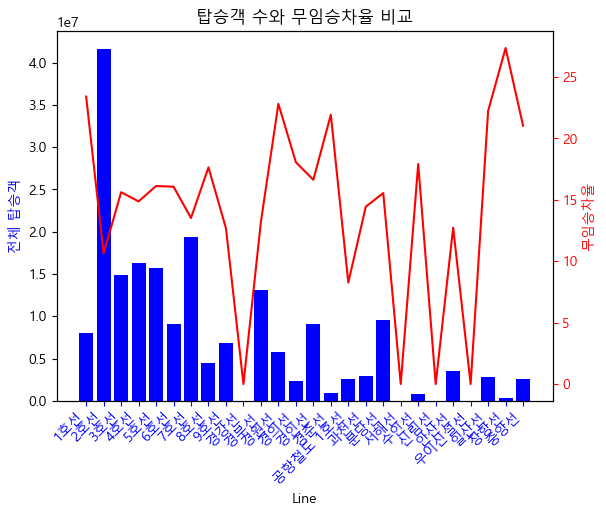

{'1호선': 2274105, '2호선': 5462547, '3호선': 2837093, '4호선': 2998579, '5호선': 3092511, '6호선': 1802758, '7호선': 3195787, '8호선': 960240, '9호선': 1052720, '경강선': 0, '경부선': 2109897, '경원선': 1634251, '경의선': 541543, '경인선': 1851865, '경춘선': 260913, '공항철도 1호선': 256149, '과천선': 524676, '분당선': 1838248, '서해선': 0, '수인선': 244450, '신림선': 0, '안산선': 559409, '우이신설선': 0, '일산선': 777269, '장항선': 123828, '중앙선': 681412}


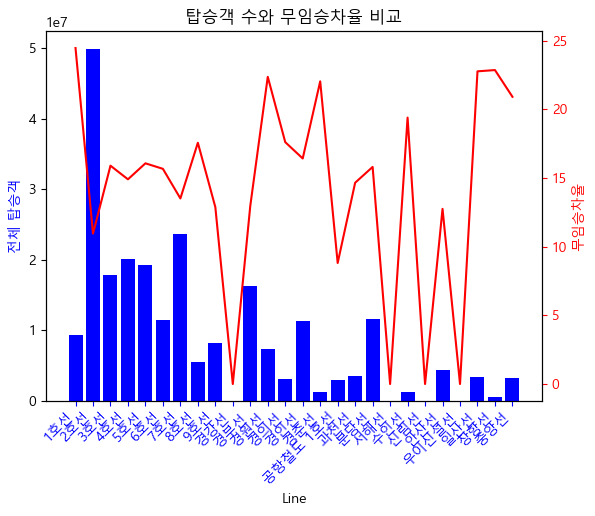

{'1호선': 2196276, '2호선': 5232681, '3호선': 2740606, '4호선': 2925124, '5호선': 3027107, '6호선': 1755824, '7호선': 3142743, '8호선': 936713, '9호선': 1066599, '경강선': 0, '경부선': 2106383, '경원선': 1643200, '경의선': 557760, '경인선': 1838629, '경춘선': 289079, '공항철도 1호선': 264451, '과천선': 549538, '분당선': 1787658, '서해선': 0, '수인선': 249804, '신림선': 0, '안산선': 567381, '우이신설선': 0, '일산선': 771737, '장항선': 118933, '중앙선': 718130}


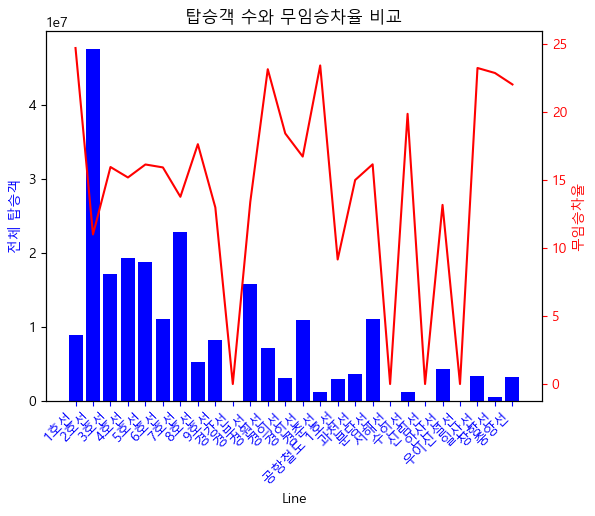

{'1호선': 2211199, '2호선': 5260291, '3호선': 2775708, '4호선': 2957518, '5호선': 3006244, '6호선': 1770269, '7호선': 3161883, '8호선': 942059, '9호선': 1040878, '경강선': 0, '경부선': 2107801, '경원선': 1681830, '경의선': 560356, '경인선': 1868659, '경춘선': 294093, '공항철도 1호선': 269385, '과천선': 549982, '분당선': 1791128, '서해선': 0, '수인선': 270368, '신림선': 0, '안산선': 570675, '우이신설선': 0, '일산선': 811745, '장항선': 117170, '중앙선': 726769}


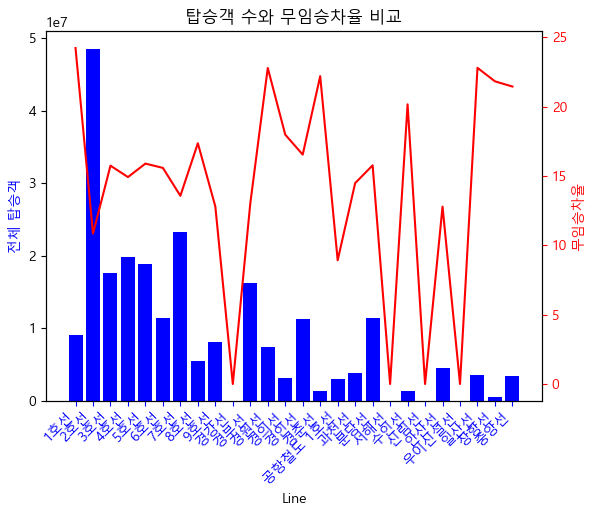

{'1호선': 2144939, '2호선': 5190990, '3호선': 2718028, '4호선': 2891011, '5호선': 2952253, '6호선': 1722830, '7호선': 3084226, '8호선': 922524, '9호선': 1034504, '경강선': 0, '경부선': 2044056, '경원선': 1637347, '경의선': 545331, '경인선': 1829056, '경춘선': 280744, '공항철도 1호선': 263663, '과천선': 523729, '분당선': 1763204, '서해선': 0, '수인선': 258604, '신림선': 0, '안산선': 550278, '우이신설선': 0, '일산선': 760108, '장항선': 110204, '중앙선': 694866}


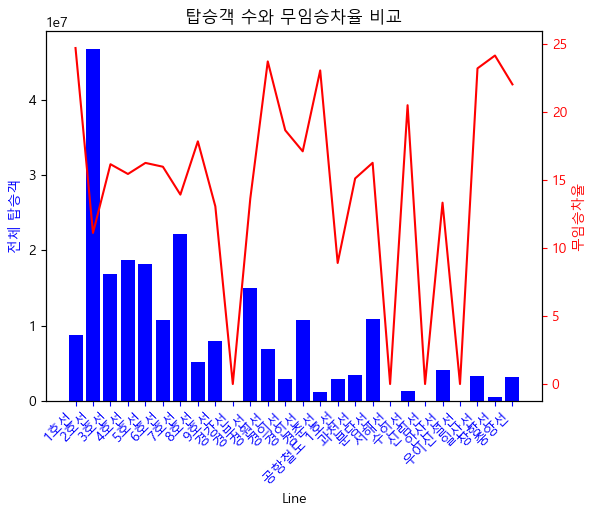

{'1호선': 2051159, '2호선': 5008593, '3호선': 2609064, '4호선': 2775201, '5호선': 2867644, '6호선': 1675209, '7호선': 2992073, '8호선': 898015, '9호선': 998382, '경강선': 0, '경부선': 1962217, '경원선': 1601215, '경의선': 527908, '경인선': 1768104, '경춘선': 265596, '공항철도 1호선': 258960, '과천선': 502131, '분당선': 1691927, '서해선': 0, '수인선': 232840, '신림선': 0, '안산선': 520707, '우이신설선': 0, '일산선': 735255, '장항선': 102598, '중앙선': 672574}


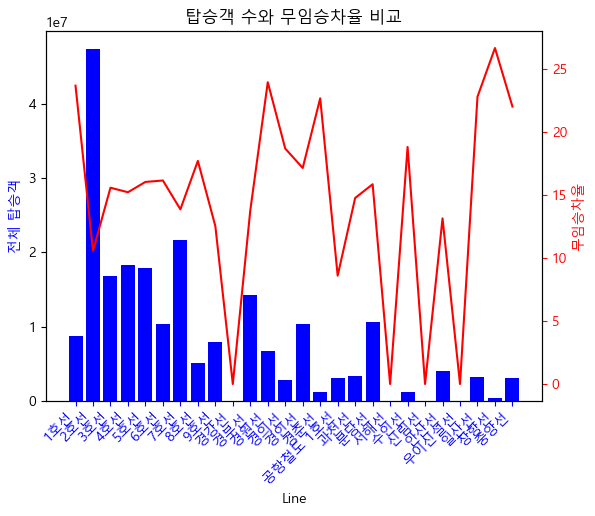

{'1호선': 2027085, '2호선': 4896024, '3호선': 2546360, '4호선': 2700292, '5호선': 2842076, '6호선': 1651762, '7호선': 2943692, '8호선': 899214, '9호선': 989792, '경강선': 0, '경부선': 1945142, '경원선': 1614891, '경의선': 536954, '경인선': 1730821, '경춘선': 278405, '공항철도 1호선': 284989, '과천선': 474049, '분당선': 1667082, '서해선': 0, '수인선': 254112, '신림선': 0, '안산선': 513753, '우이신설선': 0, '일산선': 738030, '장항선': 112142, '중앙선': 688114}


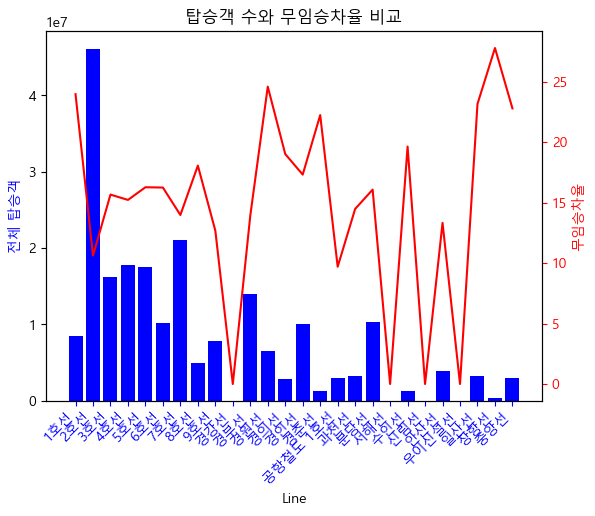

{'1호선': 4177568, '2호선': 9600264, '3호선': 5087858, '4호선': 5296742, '5호선': 5562510, '6호선': 3264612, '7호선': 5705076, '8호선': 1755540, '9호선': 1931630, '경강선': 76362, '경부선': 3856418, '경원선': 3170936, '경의선': 1066300, '경인선': 3403428, '경춘선': 540528, '공항철도 1호선': 469172, '과천선': 978300, '분당선': 3335400, '서해선': 0, '수인선': 514412, '신림선': 0, '안산선': 1023570, '우이신설선': 0, '일산선': 1442154, '장항선': 216098, '중앙선': 1333366}


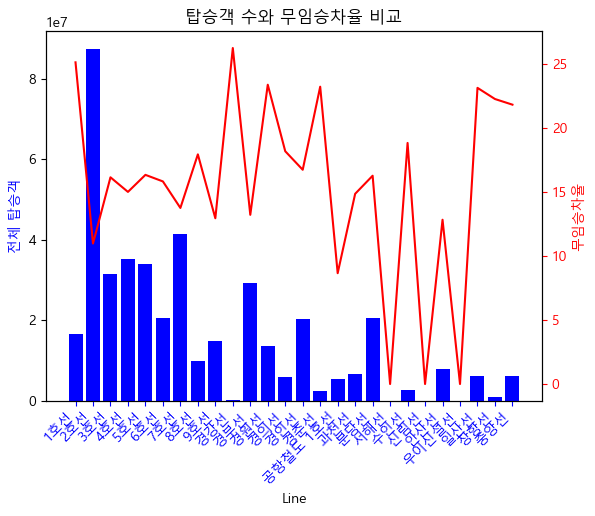

{'1호선': 4403430, '2호선': 10560644, '3호선': 5579728, '4호선': 5817122, '5호선': 6062110, '6호선': 3671752, '7호선': 6237326, '8호선': 1927062, '9호선': 2108978, '경강선': 270104, '경부선': 4200904, '경원선': 3455430, '경의선': 1154342, '경인선': 3678766, '경춘선': 590042, '공항철도 1호선': 506728, '과천선': 1100528, '분당선': 3605298, '서해선': 0, '수인선': 606590, '신림선': 0, '안산선': 1125490, '우이신설선': 0, '일산선': 1574308, '장항선': 244728, '중앙선': 1442586}


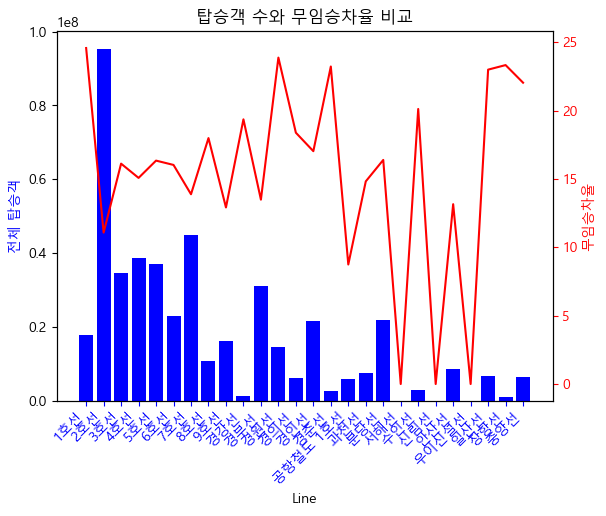

{'1호선': 2139100, '2호선': 5114348, '3호선': 2723700, '4호선': 2769816, '5호선': 2925155, '6호선': 1711692, '7호선': 2979722, '8호선': 922294, '9호선': 1013081, '경강선': 107159, '경부선': 1947405, '경원선': 1579685, '경의선': 539687, '경인선': 1712602, '경춘선': 253958, '공항철도 1호선': 233643, '과천선': 500878, '분당선': 1721525, '서해선': 0, '수인선': 254388, '신림선': 0, '안산선': 518349, '우이신설선': 0, '일산선': 739121, '장항선': 115187, '중앙선': 645477}


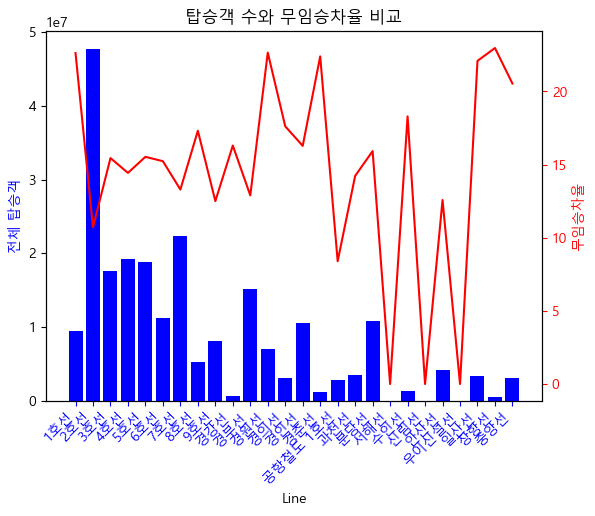

{'1호선': 2238210, '2호선': 5311232, '3호선': 2840175, '4호선': 2874944, '5호선': 3058652, '6호선': 1736265, '7호선': 3072942, '8호선': 946916, '9호선': 1044813, '경강선': 103161, '경부선': 2023117, '경원선': 1585572, '경의선': 528151, '경인선': 1768083, '경춘선': 248035, '공항철도 1호선': 234042, '과천선': 501124, '분당선': 1769415, '서해선': 0, '수인선': 247318, '신림선': 0, '안산선': 523568, '우이신설선': 0, '일산선': 748427, '장항선': 122979, '중앙선': 637016}


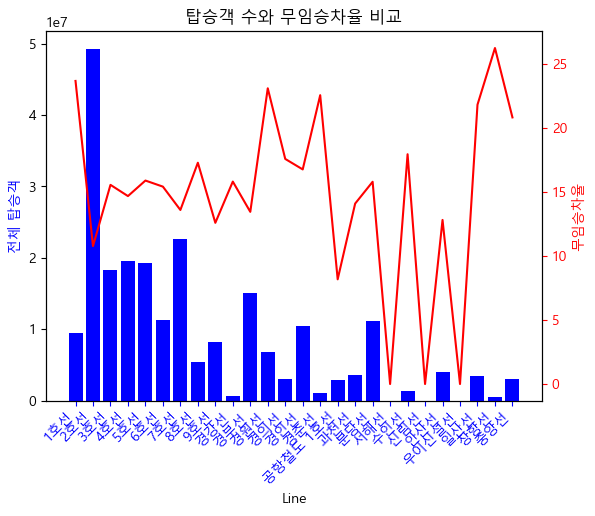

In [146]:
for i in range(201601, 201613):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()

In [ ]:
for i in range(201701, 201713):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()

In [ ]:
for i in range(201801, 201813):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()

In [ ]:
for i in range(201901, 201913):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()

In [ ]:
for i in range(202001, 202013):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show() 

In [ ]:
for i in range(202101, 202113):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()  

In [ ]:
for i in range(202201, 202213):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()

In [ ]:
for i in range(202301, 202311):
    dict_FreeRiders = {}
    dict_AllRiders = {}
    percentage_dict = {}
    dict_FreeRiders, dict_AllRiders, percentage_dict = make_freegraph.GetPercentage(i)
    
    print(dict_FreeRiders)
    
    # make graph
    x_values = list(dict_AllRiders.keys())
    y_values = list(dict_AllRiders.values())
    y_values2 = list(percentage_dict.values())
   
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
  
    # Plot the bar graph on the primary y-axis (ax1)
    ax1.bar(x_values, y_values, color='b', label='Bar Graph')
    ax1.set_xlabel('Line')
    ax1.set_ylabel('전체 탑승객', color='b')
    ax1.tick_params('x', colors='b')
    plt.xticks(rotation=45, ha='right')
  
    # Create a secondary y-axis (ax2) for the line graph
    ax2 = ax1.twinx()
    ax2.plot(x_values, y_values2, color='r', label='Line Graph')
    ax2.set_ylabel('무임승차율', color='r')
    ax2.tick_params('y', colors='r')
    
    # Display the plot
    plt.title('탑승객 수와 무임승차율 비교')
    plt.show()   

### 역별 노인무임승차자

In [4]:
df2 = pd.read_csv('C:/Users/sunny/!!!기계 학습/무임승차.csv', sep = ',', header = 0, engine = 'python', encoding='euc-kr', encoding_errors='ignore')

 Select the columns you want to combine
selected_columns = df2[['Column1', 'Column2', 'Column3']]

 Combine the selected columns into a new column under a single name
df2['NewColumnName'] = selected_columns.apply(lambda row: '-'.join(map(str, row)), axis=1)

 Display the DataFrame with the new column
print(df2)

In [14]:
df2['2016'][2]

'431540'

In [22]:
df2.iloc[2, 1]

'431540'

In [ ]:
# delete this

def ElderlyFree(self, a, b):
    for i in range()
    if i == df2[a] and df2[b]:
        




In [110]:
# 노인무임승차율 비율 함수 만들어봄
class MyClass:
    def GetElderPercent(self, a):
        list_Free = []
        for i in range(2, 18):
            value = df2.iloc[i, a]
            if value == '-':
                list_Free.append(0)
            else:
                list_Free.append(int(value))
        
        list_Elders = []
        for i in range(2, 18):
            value = df2.iloc[i, a+2]
            if value == '-':
                list_Elders.append(0)
            else:
                list_Elders.append(int(value))
    
        PercentageElders_dict = {}
        for i in range(len(list_Free)):
            if list_Free[i] == 0:
                PercentageElders_dict[df2.iloc[i+2, 0]] = 0
            else:
                PercentageElders_dict[df2.iloc[i+2, 0]] = list_Elders[i]/list_Free[i] * 100
        return(PercentageElders_dict)


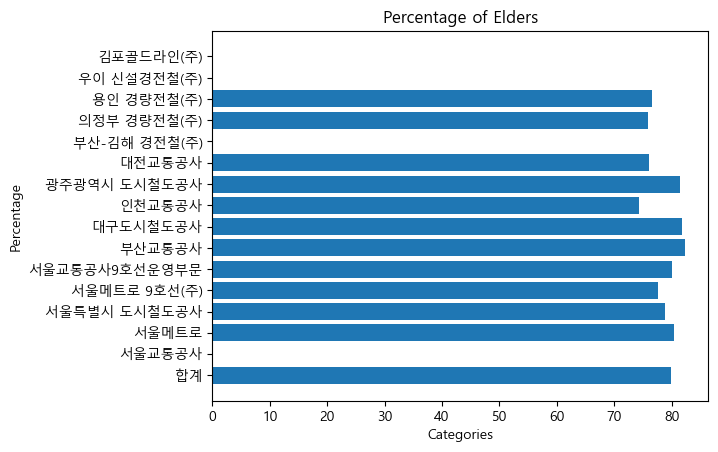

In [64]:
# 2016
PercentageElders_dict = MyClass.GetElderPercent(df2, 1)

categories = list(PercentageElders_dict.keys())
values = list(PercentageElders_dict.values())

# Plot the bar graph that is horizontal!
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Elders')

# Show the plot
plt.show()

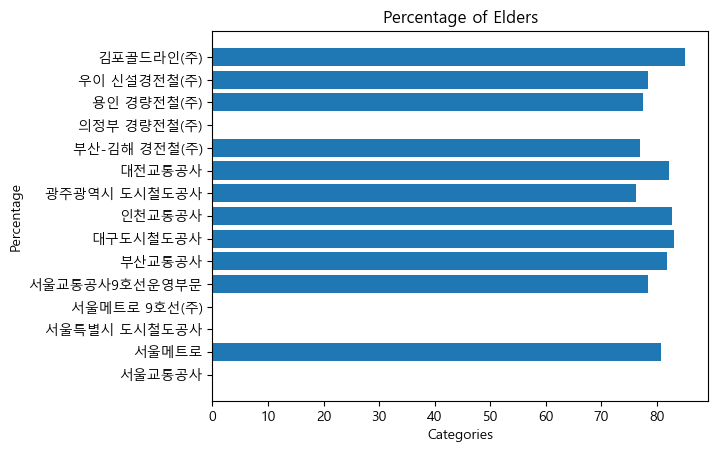

In [109]:
# 2017
# 2017년만 합계같은걸 보면 밀린것같아
PercentageElders_dict = MyClass.GetElderPercent(df2, 11)

categories2 = list(PercentageElders_dict.keys())
values2 = list(PercentageElders_dict.values())

# Plot the bar graph that is horizontal!
plt.barh(categories2, values2)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Elders')

# Show the plot
plt.show()

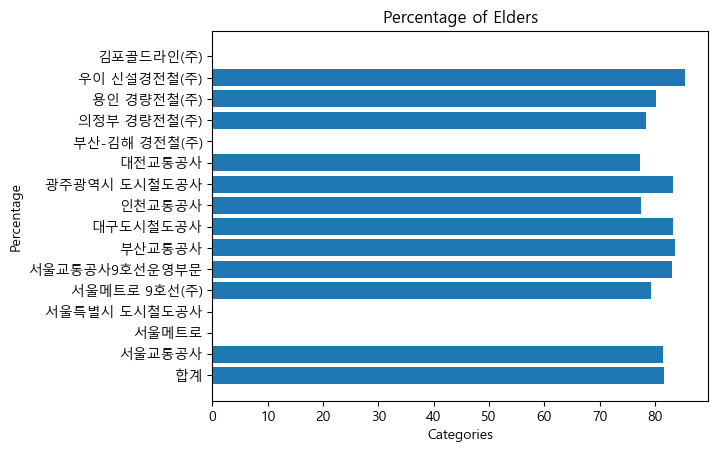

In [67]:
# 2018
PercentageElders_dict = MyClass.GetElderPercent(df2, 21)

categories = list(PercentageElders_dict.keys())
values = list(PercentageElders_dict.values())

# Plot the bar graph that is horizontal!
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Elders')

# Show the plot
plt.show()

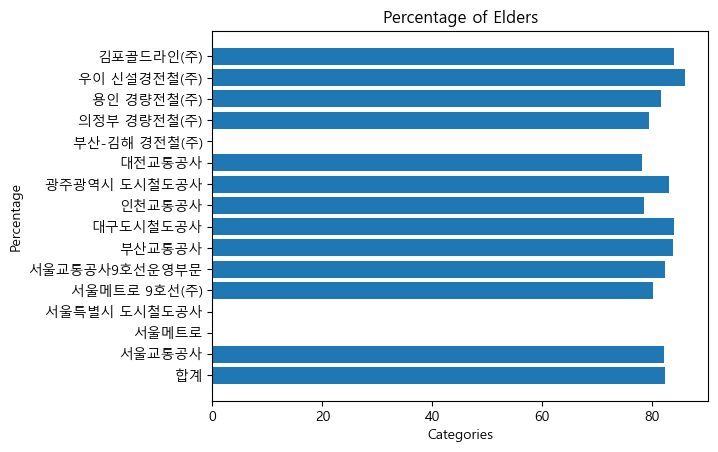

In [68]:
# 2019
PercentageElders_dict = MyClass.GetElderPercent(df2, 31)

categories = list(PercentageElders_dict.keys())
values = list(PercentageElders_dict.values())

# Plot the bar graph that is horizontal!
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Elders')

# Show the plot
plt.show()

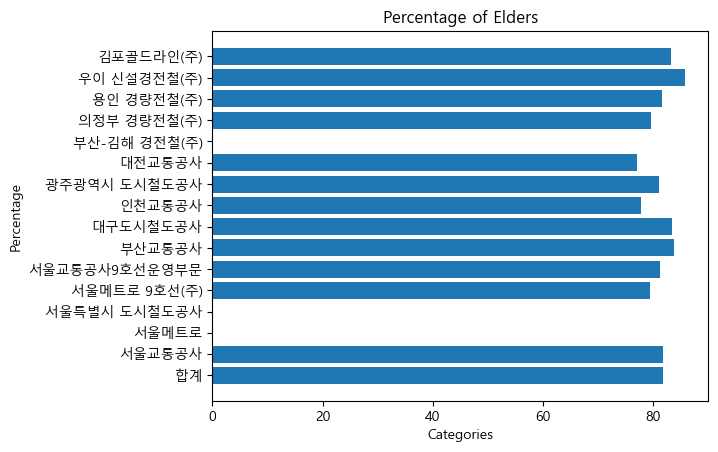

In [69]:
# 2020
PercentageElders_dict = MyClass.GetElderPercent(df2, 41)

categories = list(PercentageElders_dict.keys())
values = list(PercentageElders_dict.values())

# Plot the bar graph that is horizontal!
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Elders')

# Show the plot
plt.show()

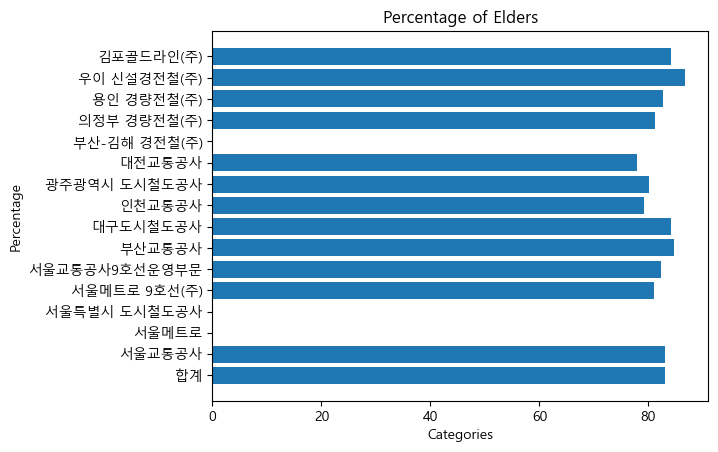

In [70]:
# 2021
PercentageElders_dict = MyClass.GetElderPercent(df2, 51)

categories = list(PercentageElders_dict.keys())
values = list(PercentageElders_dict.values())

# Plot the bar graph that is horizontal!
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Elders')

# Show the plot
plt.show()

### 무임승차율 중 노인비율

In [75]:
# Nope. making three dictionaries for this was a stupid idea
# abort
class MyClass:
    def GetElderPercent(self, a):
        list_Free = []
        for i in range(2, 18):
            value = df2.iloc[i, a]
            if value == '-':
                list_Free.append(0)
            else:
                list_Free.append(int(value))
        
        list_Elders = []
        for i in range(2, 18):
            value = df2.iloc[i, a+2]
            if value == '-':
                list_Elders.append(0)
            else:
                list_Elders.append(int(value))
    
        PercentageElders_dict = {}
        for i in range(len(list_Free)):
            if list_Free[i] == 0:
                PercentageElders_dict[df2.iloc[i+2, 0]] = 0
            else:
                PercentageElders_dict[df2.iloc[i+2, 0]] = list_Elders[i]/list_Free[i] * 100
        return(PercentageElders_dict)
    
    def GetHandiPercent(self, a):
        list_Free = []
        for i in range(2, 18):
            value = df2.iloc[i, a]
            if value == '-':
                list_Free.append(0)
            else:
                list_Free.append(int(value))
        
        list_Handi = []
        for i in range(2, 18):
            value = df2.iloc[i, a+2]
            if value == '-':
                list_Handi.append(0)
            else:
                list_Handi.append(int(value))
    
        PercentageHandi_dict = {}
        for i in range(len(list_Free)):
            if list_Free[i] == 0:
                PercentageHandi_dict[df2.iloc[i+2, 0]] = 0
            else:
                PercentageHandi_dict[df2.iloc[i+2, 0]] = list_Handi[i]/list_Free[i] * 100
        return(PercentageHandi_dict)
    
    
    def GetMeritPercent(self, a):
        list_Free = []
        for i in range(2, 18):
            value = df2.iloc[i, a]
            if value == '-':
                list_Free.append(0)
            else:
                list_Free.append(int(value))
        
        list_Merit = []
        for i in range(2, 18):
            value = df2.iloc[i, a+2]
            if value == '-':
                list_Merit.append(0)
            else:
                list_Merit.append(int(value))
    
        PercentageMerit_dict = {}
        for i in range(len(list_Free)):
            if list_Free[i] == 0:
                PercentageMerit_dict[df2.iloc[i+2, 0]] = 0
            else:
                PercentageMerit_dict[df2.iloc[i+2, 0]] = list_Merit[i]/list_Free[i] * 100
        return(PercentageMerit_dict)


In [101]:
df2.iloc[2, 4]

'450692'

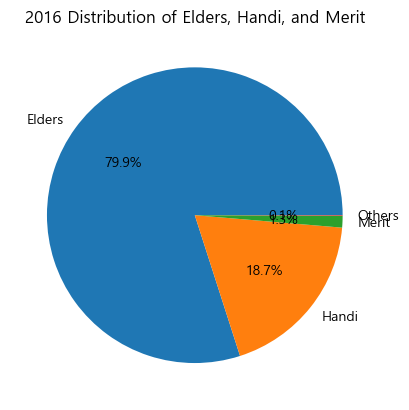

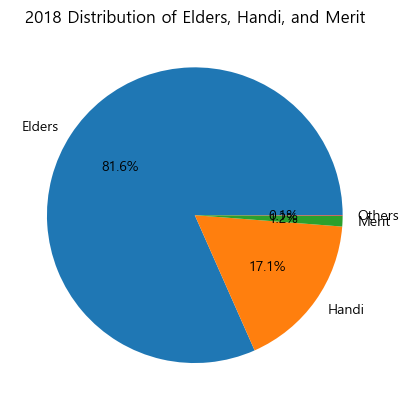

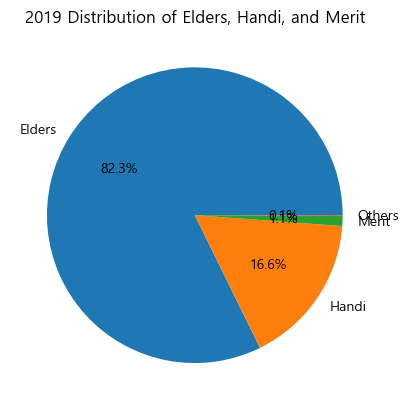

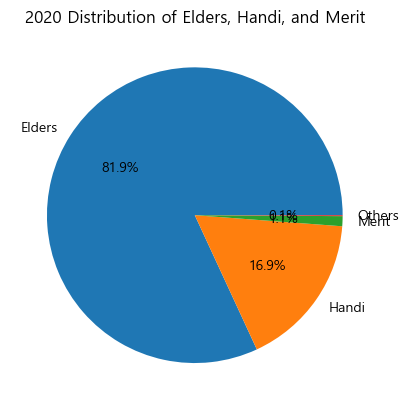

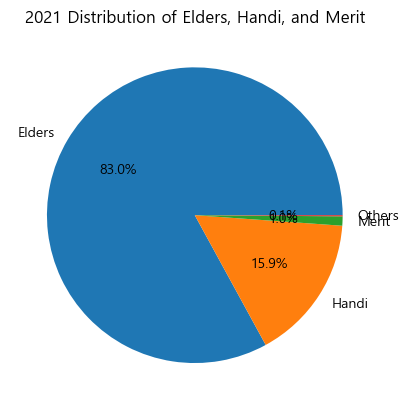

In [122]:
# 2016
# Extract values for Elders, Handi, and Merit
elders_value = df2.iloc[2, 3]
handi_value = df2.iloc[2, 5]
merit_value = df2.iloc[2, 7]
others_value = df2.iloc[2, 9]

# Create a dictionary for the pie chart
data_dict = {'Elders': elders_value, 'Handi': handi_value, 'Merit': merit_value, 'Others': others_value}

# Plot the pie chart
plt.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=0)
plt.title('2016 Distribution of Elders, Handi, and Merit')

# Show the plot
plt.show()

"""
# 2017
# Extract values for Elders, Handi, and Merit
elders_value = df2.iloc[2, 3]
handi_value = df2.iloc[2, 5]
merit_value = df2.iloc[2, 7]
others_value = df2.iloc[2, 9]

# Create a dictionary for the pie chart
data_dict = {'Elders': elders_value, 'Handi': handi_value, 'Merit': merit_value, 'Others': others_value}

# Plot the pie chart
plt.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Elders, Handi, and Merit')

# Show the plot
plt.show()
"""

# 2018
elders_value = df2.iloc[2, 23]
handi_value = df2.iloc[2, 25]
merit_value = df2.iloc[2, 27]
others_value = df2.iloc[2, 29]

# Create a dictionary for the pie chart
data_dict = {'Elders': elders_value, 'Handi': handi_value, 'Merit': merit_value, 'Others': others_value}

# Plot the pie chart
plt.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=0)
plt.title('2018 Distribution of Elders, Handi, and Merit')

# Show the plot
plt.show()

# 2019
# Extract values for Elders, Handi, and Merit
elders_value = df2.iloc[2, 33]
handi_value = df2.iloc[2, 35]
merit_value = df2.iloc[2, 37]
others_value = df2.iloc[2, 39]

# Create a dictionary for the pie chart
data_dict = {'Elders': elders_value, 'Handi': handi_value, 'Merit': merit_value, 'Others': others_value}

# Plot the pie chart
plt.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=0)
plt.title('2019 Distribution of Elders, Handi, and Merit')

# Show the plot
plt.show()

# 2020
# Extract values for Elders, Handi, and Merit
elders_value = df2.iloc[2, 43]
handi_value = df2.iloc[2, 45]
merit_value = df2.iloc[2, 47]
others_value = df2.iloc[2, 49]

# Create a dictionary for the pie chart
data_dict = {'Elders': elders_value, 'Handi': handi_value, 'Merit': merit_value, 'Others': others_value}

# Plot the pie chart
plt.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=0)
plt.title('2020 Distribution of Elders, Handi, and Merit')

# Show the plot
plt.show()

# 2021
# Extract values for Elders, Handi, and Merit
elders_value = df2.iloc[2, 53]
handi_value = df2.iloc[2, 55]
merit_value = df2.iloc[2, 57]
others_value = df2.iloc[2, 59]

# Create a dictionary for the pie chart
data_dict = {'Elders': elders_value, 'Handi': handi_value, 'Merit': merit_value, 'Others': others_value}

# Plot the pie chart
plt.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=0)
plt.title('2021 Distribution of Elders, Handi, and Merit')

# Show the plot
plt.show()

### 시간대별 노인 무임승차율

In [3]:
# 2021
df2 = pd.read_csv('C:/Users/sunny/!!!기계 학습/서울교통공사_역별 일별 시간대별 노인 승하차인원_20211231.csv', sep = ',', header = 0, engine = 'python', encoding='euc-kr', encoding_errors='ignore')

In [5]:
# 2022
df3 = pd.read_csv('C:/Users/sunny/!!!기계 학습/서울교통공사_역별 일별 시간대별 노인 승하차인원_20221231.csv', sep = ',', header = 0, engine = 'python', encoding='euc-kr', encoding_errors='ignore')

In [6]:
# 2023
df4 = pd.read_csv('C:/Users/sunny/!!!기계 학습/서울교통공사_역별 일별 시간대별 노인 승하차인원 정보_20230930.csv', sep = ',', header = 0, engine = 'python', encoding='euc-kr', encoding_errors='ignore')

In [ ]:
# 2021

In [4]:
df2.head()

,연번,수송일자,역번호,역명,승하차구분,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,14-15시간대,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23시간대이후
0,1,2021-07-01,150,서울역,승차,77,71,134,214,213,...,439,499,441,419,283,196,119.0,129.0,52.0,21
1,2,2021-07-01,150,서울역,하차,65,235,249,265,361,...,316,365,370,240,184,128,87.0,63.0,37.0,16
2,3,2021-07-01,151,시청,승차,23,28,23,35,47,...,195,296,230,193,136,74,65.0,42.0,23.0,8
3,4,2021-07-01,151,시청,하차,48,86,115,155,181,...,131,105,77,67,53,18,18.0,12.0,4.0,4
4,5,2021-07-01,152,종각,승차,28,27,40,45,96,...,397,513,428,294,175,174,151.0,136.0,67.0,10


In [13]:
df2.iloc[0, 5]

77

In [16]:
df2['23시간대이후'][1]

16

In [14]:
list_of_time = ['06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23시간대이후']

In [17]:
# No longer needed
time_dict = {}
for i in list_of_time:
    NumRiders = df2[i][0]
    time_dict[i] = NumRiders
    
print(time_dict)

{'06시간대이전': 77, '06-07시간대': 71, '07-08시간대': 134, '08-09시간대': 214, '09-10시간대': 213, '10-11시간대': 323, '11-12시간대': 368, '12-13시간대': 398, '13-14시간대': 351, '14-15시간대': 439, '15-16시간대': 499, '16-17시간대': 441, '17-18시간대': 419, '18-19시간대': 283, '19-20시간대': 196, '20-21시간대': 119.0, '21-22시간대': 129.0, '22-23시간대': 52.0, '23시간대이후': 21}


In [25]:
AllLinesTime_dict = {}
AllLinesTime_dict = {time: 0 for time in list_of_time}
for j in range(0, 103070, 2):
    for i in list_of_time:
        NumRiders = df2[i][j]
        AllLinesTime_dict[i] += NumRiders
        
print(AllLinesTime_dict)

{'06시간대이전': 2769479, '06-07시간대': 3181884, '07-08시간대': 3646412, '08-09시간대': 4654502, '09-10시간대': 5923588, '10-11시간대': 6668634, '11-12시간대': 6822151, '12-13시간대': 6811641, '13-14시간대': 7010279, '14-15시간대': 7592360, '15-16시간대': 8148769, '16-17시간대': 7394618, '17-18시간대': 6093326, '18-19시간대': 4351642, '19-20시간대': 2867530, '20-21시간대': nan, '21-22시간대': nan, '22-23시간대': nan, '23시간대이후': 148112}


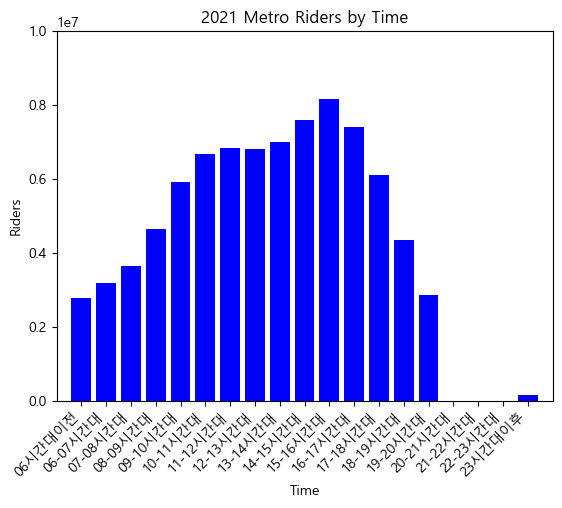

In [28]:
time = list(AllLinesTime_dict.keys())
riders = list(AllLinesTime_dict.values())

plt.bar(time, riders, color='blue', width=0.8)

plt.xlabel('Time')
plt.ylabel('Riders')
plt.title('2021 Metro Riders by Time')
plt.xticks(rotation=45, ha='right')
bar_spacing = 1
plt.xlim(-bar_spacing, len(time) - 1 + bar_spacing)
plt.ylim(0, 10000000)

plt.show()

In [ ]:
# 2022

In [37]:
list_of_time = ['06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후']

{'06시간대이전': 5654698, '06-07시간대': 6603395, '07-08시간대': 7673444, '08-09시간대': 10048848, '09-10시간대': 12863153, '10-11시간대': 14404718, '11-12시간대': 14952191, '12-13시간대': 15430389, '13-14시간대': 15921575, '14-15시간대': 17116754, '15-16시간대': 18388364, '16-17시간대': 16840798, '17-18시간대': 13641275, '18-19시간대': 9766233, '19-20시간대': 6731515, '20-21시간대': nan, '21-22시간대': nan, '22-23시간대': 1783972, '23-24시간대': 489223, '24시간대이후': 37783}


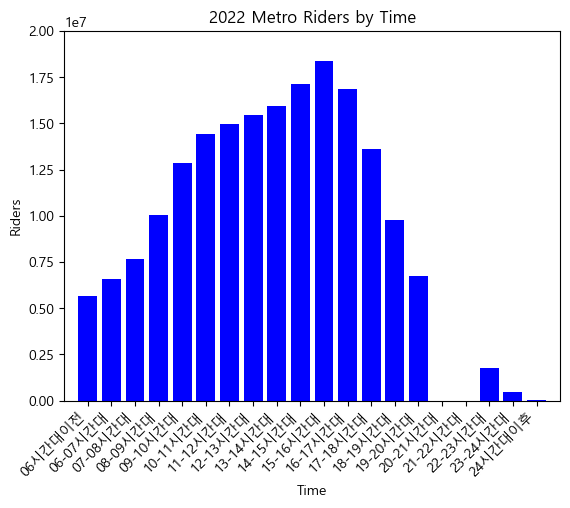

In [41]:
AllLinesTime_dict = {}
AllLinesTime_dict = {time: 0 for time in list_of_time}
for j in range(0, 198560, 2):
    for i in list_of_time:
        NumRiders = df3[i][j]
        AllLinesTime_dict[i] += NumRiders
        
print(AllLinesTime_dict)

time = list(AllLinesTime_dict.keys())
riders = list(AllLinesTime_dict.values())

plt.bar(time, riders, color='blue', width=0.8)

plt.xlabel('Time')
plt.ylabel('Riders')
plt.title('2022 Metro Riders by Time')
plt.xticks(rotation=45, ha='right')
bar_spacing = 1
plt.xlim(-bar_spacing, len(time) - 1 + bar_spacing)
plt.ylim(0, 20000000)

plt.show()

In [ ]:
# 2023

In [30]:
list_of_time = ['06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후']

{'06시간대이전': 6000135, '06-07시간대': 6612721, '07-08시간대': 7666298, '08-09시간대': 10205107, '09-10시간대': 13074232, '10-11시간대': 14553904, '11-12시간대': 15156765, '12-13시간대': 15464272, '13-14시간대': 15747688, '14-15시간대': 16735323, '15-16시간대': 18069574, '16-17시간대': 16743810, '17-18시간대': 13846730, '18-19시간대': 10207886, '19-20시간대': 7192977, '20-21시간대': nan, '21-22시간대': nan, '22-23시간대': nan, '23-24시간대': nan, '24시간대이후': 127268}


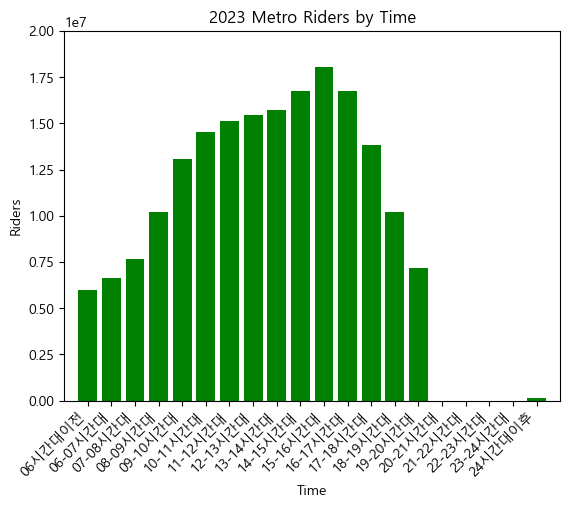

In [39]:
AllLinesTime_dict = {}
AllLinesTime_dict = {time: 0 for time in list_of_time}
for j in range(0, 119159, 2):
    for i in list_of_time:
        NumRiders = df4[i][j]
        AllLinesTime_dict[i] += NumRiders
        
for j in range(119160, 148595, 2):
    for i in list_of_time:
        NumRiders = df4[i][j]
        AllLinesTime_dict[i] += NumRiders
        
        
        
print(AllLinesTime_dict)

time = list(AllLinesTime_dict.keys())
riders = list(AllLinesTime_dict.values())

plt.bar(time, riders, color='green', width=0.8)

plt.xlabel('Time')
plt.ylabel('Riders')
plt.title('2023 Metro Riders by Time')
plt.xticks(rotation=45, ha='right')
bar_spacing = 1
plt.xlim(-bar_spacing, len(time) - 1 + bar_spacing)
plt.ylim(0, 20000000)

plt.show()

### 2023
- 119159번 줄 건너 뛰어야함.
- range(0, 119159, 2) & (119160, 148595, 2)
- 2021년보다 2022와 2023 모두 2배로 y 축 늘려야했음. 아마 코로나 제한이 풀리면서 탑승객 수가 크게 증폭함.

In [43]:
import statsmodels.api as sm

In [47]:
df2['06-07시간대']

0          71
1         235
2          28
3          86
4          27
         ... 
103065     40
103066     24
103067     29
103068     20
103069     13
Name: 06-07시간대, Length: 103070, dtype: int64

In [5]:

"""features = 
X = pd.DataFrame(df2[features], columns=features)
Y = pd.DataFrame(df2[['서울역']], columns=['06-07시간대'])"""

"features = \nX = pd.DataFrame(df2[features], columns=features)\nY = pd.DataFrame(df2[['서울역']], columns=['06-07시간대'])"

In [6]:
"""X = AllLinesTime_dict.keys()
Y = AllLinesTime_dict.values()

model = sm.OLS(Y, X).fit()
print(model.summary())"""

'X = AllLinesTime_dict.keys()\nY = AllLinesTime_dict.values()\n\nmodel = sm.OLS(Y, X).fit()\nprint(model.summary())'

# 결론

- 각 노인 무임승차자로부터 얼마를 걷을 시 결과 (고령화 지수를 )
- 무임승차자가 많은 역에서 승하차 시 비용 지불
- 시간대
- 


- 수익을 우리가 계산
- 무임승차율과 수익 회기분석(the dots can be the number of free riders and the line can be the total)



- 독립변수: '연령/고령화율', '독거 노인/부양가족과 함께 거주', '노인 취업률', (집값), (버스 승차율), 자녀 동거율(자녀와 함께 살면 지하철 이용률 감소), '기름값/유가'

- 종속변수: 무임승차율(무임승차율로 인한 손실 증명)

- https://data.seoul.go.kr/dataList/10178/S/2/datasetView.do